In [3]:
import pandas
data = pandas.read_csv("Tweets.csv")
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [4]:
# Check for empties
data.isnull().sum()#we only want text and airline sentiments
#Text and airline sentiments,no empties

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [5]:
data.dtypes
#the data types are correct

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [6]:
# split to 30% for testing 70% for training
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(data['text'], data['airline_sentiment'],
                                                                    test_size = 0.3,
                                                                    random_state=42)


In [7]:
#transfeoms words to ) and 1
 #data is in matrix
 #stopwords has been removed
 #x isikue words
 # remove stop words  from X_train or X_test
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase = True, stop_words = 'english')#This line imports the CountVectorizer from sklearn.feature_extraction.text, creates a vectorizer that converts text to lowercase and removes English stop words, and then fits and transforms the training text data into a numerical format (sparse matrix).

X_train_new = vectorizer.fit_transform(X_train)
X_train_new

<10248x12061 sparse matrix of type '<class 'numpy.int64'>'
	with 93480 stored elements in Compressed Sparse Row format>

In [8]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

model = LogisticRegression()
model.fit(X_train_new, Y_train)

LogisticRegression()

In [9]:
# test the model, first vectorize
X_test_new = vectorizer.transform(X_test)#These lines transform the testing text data (X_test) using the previously fitted vectorizer, make predictions using the trained model, and then print the count of each sentiment class in the original data.
predictions = model.predict(X_test_new)
print(data.groupby('airline_sentiment').size())

airline_sentiment
negative    9178
neutral     3099
positive    2363
dtype: int64


In [10]:
#Test accuracy
from sklearn.metrics import accuracy_score
print('Accuracy ', accuracy_score(Y_test, predictions))

Accuracy  0.7896174863387978


In [11]:
# pull a database, csv, from api
newdata = pandas.read_csv("sample.csv")
newdata

,Text
0,your airline is awesome but your lax loft need...
1,"not worried, it's been a great ride in a new p..."
2,awesome. I flew yall Sat morning. Any way we c...
3,"Hi, Virgin! I'm on hold for 40-50 minutes -- a..."
4,"Hi, Virgin, I like your services"
5,"Your services are bad, its not as expected"
6,Its very unfortunate that I did not get what I...
7,"This is not good, improve!"
8,I waited for 40 minutes but we left though
9,"this is very nice, I enjoyed"


In [19]:
# Use the model to predict above clients sentiments
#change to matix
newdata_vectorized = vectorizer.transform(newdata['Text'])
outcome = model.predict(newdata_vectorized)
print('airline_sentiment',  outcome)
#Improve the model to atleast 85%
outcomedf = pandas.DataFrame(outcome, columns=['Sentiment'])
outcomedf



airline_sentiment ['negative' 'positive' 'positive' 'neutral' 'neutral' 'negative' 'neutral'
 'positive' 'negative' 'positive' 'negative' 'neutral']


,Sentiment
0,negative
1,positive
2,positive
3,neutral
4,neutral
5,negative
6,neutral
7,positive
8,negative
9,positive


: 

In [13]:
results = newdata.merge(outcomedf, left_index=True,right_index=True)
results


,Text,Sentiment
0,your airline is awesome but your lax loft need...,negative
1,"not worried, it's been a great ride in a new p...",positive
2,awesome. I flew yall Sat morning. Any way we c...,positive
3,"Hi, Virgin! I'm on hold for 40-50 minutes -- a...",neutral
4,"Hi, Virgin, I like your services",neutral
5,"Your services are bad, its not as expected",negative
6,Its very unfortunate that I did not get what I...,neutral
7,"This is not good, improve!",positive
8,I waited for 40 minutes but we left though,negative
9,"this is very nice, I enjoyed",positive


<Axes: >

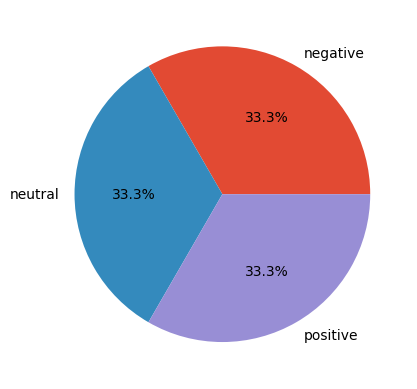

In [14]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
results.groupby('Sentiment').size().plot(kind='pie', autopct = '%1.1f%%')

In [15]:
negatives = results[results['Sentiment'] == 'negative']
negatives

positives = results[results['Sentiment'] == 'positive']
positives

neutral = results[results['Sentiment'] == 'neutral']
neutral

,Text,Sentiment
3,"Hi, Virgin! I'm on hold for 40-50 minutes -- a...",neutral
4,"Hi, Virgin, I like your services",neutral
6,Its very unfortunate that I did not get what I...,neutral
11,I enjoyed my journey on this flight,neutral


In [18]:
# create a CSV with the negatives only
negatives.to_csv("negatives.csv")
positives.to_csv("positives.csv")
neutral.to_csv("neutral.csv")